In [1]:
import sys
import os
os.chdir('../')

import itertools as it
import numpy as np
import pandas as pd
import pylab as py
import matplotlib.pyplot as plt
from  matplotlib import rc
from matplotlib.colors import LogNorm
%matplotlib inline

from tools.tools import save,load,lprint,load_config
from tools.bar import BAR

In [2]:
from fitlab.resman import RESMAN
from fitlab.parman import PARMAN

In [3]:
!ls runs/boermulders/boermulders.py

runs/boermulders/boermulders.py


In [4]:
conf=load_config('inputs/boermulders.py')
conf['resman']=RESMAN(conf)
conf['resman'].get_residuals(conf['parman'].par);

loading sidis data sets 5000
loading sidis data sets 5001
loading sidis data sets 5002
loading sidis data sets 5003
loading sidis data sets 5004
loading sidis data sets 5005
loading sidis data sets 5006
loading sidis data sets 5007
loading sidis data sets 5008
loading sidis data sets 5009
loading sidis data sets 5010
loading sidis data sets 5011
loading sidis data sets 5012
loading sidis data sets 5013
loading sidis data sets 5014
loading sidis data sets 5015


In [5]:
def get_binned_axis(dataframe, axis):
    return np.unique(dataframe[axis])

def create_rounded_variables(dataframe):
    dataframe['rounded_z']  = np.round(dataframe['z'], 1)
    dataframe['rounded_q2'] = np.round(dataframe['Q2'], 1)

In [6]:
datasets = {}

for index, data in conf['resman'].sidisres.tabs.iteritems():
    datasets[index] = pd.DataFrame(data) 
    create_rounded_variables(datasets[index])

In [7]:
datasets[5000].columns

Index([      u'Ebeam',           u'N',          u'Q2',       u'Shift',
             u'alpha',         u'col',      u'hadron',           u'i',
               u'obs',          u'pT', u'r-residuals',   u'residuals',
             u'shift',      u'stat_u',       u'sys_u',      u'target',
               u'thy',       u'value',           u'x',           u'y',
                 u'z',   u'rounded_z',  u'rounded_q2'],
      dtype='object')

In [8]:
print np.unique(datasets[5000].rounded_z)
print get_binned_axis(datasets[5000], 'rounded_z')

[ 0.3  0.4  0.5]
[ 0.3  0.4  0.5]


In [9]:
print np.unique(datasets[5000].rounded_q2)
print get_binned_axis(datasets[5000], 'rounded_q2')

[ 1.9  2.   2.1  2.3  2.8  3.5  3.6  3.7  3.8  4.2  5.1  5.2  6.4  6.5  9.3
  9.4]
[ 1.9  2.   2.1  2.3  2.8  3.5  3.6  3.7  3.8  4.2  5.1  5.2  6.4  6.5  9.3
  9.4]


In [10]:
def get_subset(data, cuts):
    data_subset = data.query(cuts)
    return data_subset

## Testing 
Here we test the pieces of the plotting code to make sure they are working properly.

<Container object of 3 artists>

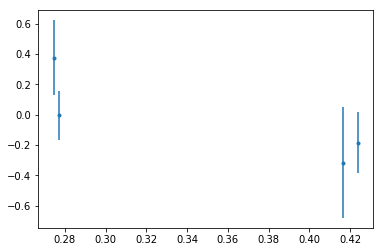

In [11]:
CUTS = 'rounded_q2 == 6.4 and rounded_z == 0.3'
data_subset = get_subset(datasets[5000], CUTS)

#data_subset.head(12)

data_subset.sort_values('pT', inplace=True)
data_subset.head(12)
plt.errorbar(data_subset.pT, data_subset.value, data_subset.alpha, linestyle='', marker='.')

In [12]:
def plot(data):

    COLORS = ['blue', 'orange', 'red', 'purple', 'green']    

    z_axis = get_binned_axis(data, 'rounded_z')
    q2_axis = get_binned_axis(data, 'rounded_q2')
    
    # setting up plotting options
    cols = 3 
    rows = np.ceil(len(q2_axis)/cols)
    
    plt.figure(figsize=(16,10*rows))
    
    pt_limits = 0.9*np.min(data.pT), 1.1*np.max(data.pT)
    
    for q2_index, q2_value in enumerate(q2_axis):

        plt.subplot(rows*cols, cols, q2_index+1)
    
        for index, z_value in enumerate(z_axis):
        
            # choose z value for this bin and plot on same figure 
            z_cut = ('rounded_q2 == %f and rounded_z == %f' % (q2_value, z_value))
            data_subset = get_subset(data, z_cut)
            data_subset.sort_values('pT', inplace=True)

            plt.errorbar(data_subset.pT, data_subset.value, data_subset.alpha, 
                         linestyle='', marker='.', color=COLORS[index])
        
            plt.plot(data_subset.pT, data_subset.thy, linestyle='--', color=COLORS[index])
            plt.xlabel('$P_T$')
            plt.xlim(pt_limits)
#            observable_name = np.unique(data_subset.obs)[0]
#            plt.ylabel(observable_name)

    plt.tight_layout()

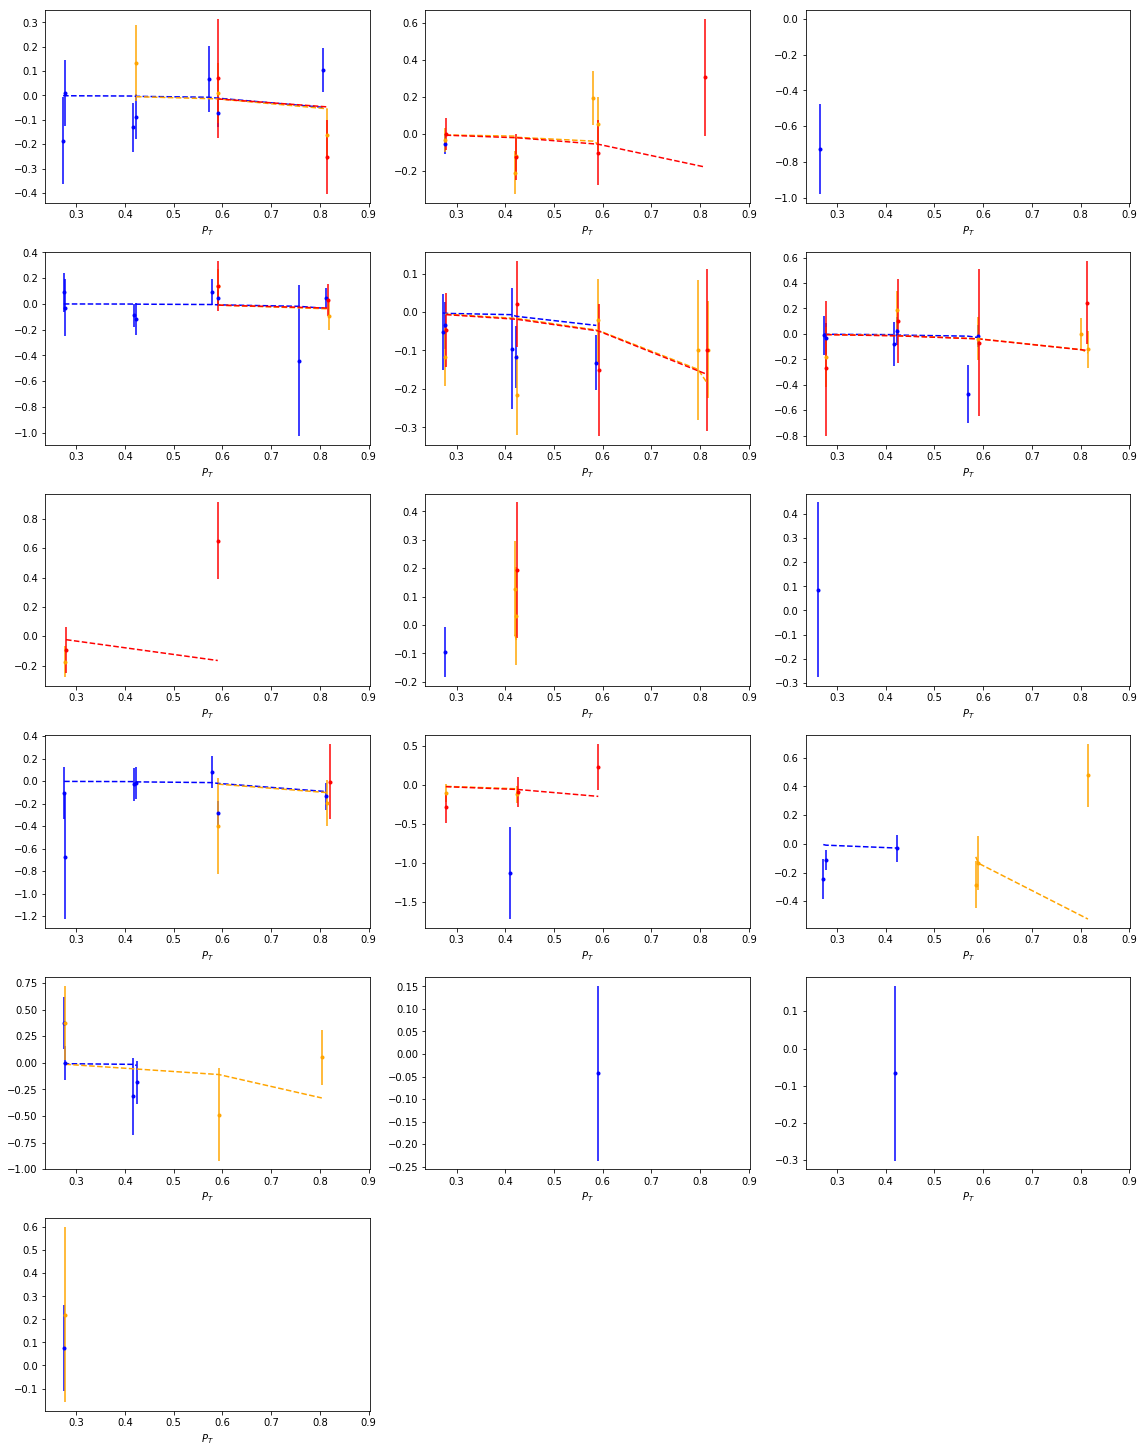

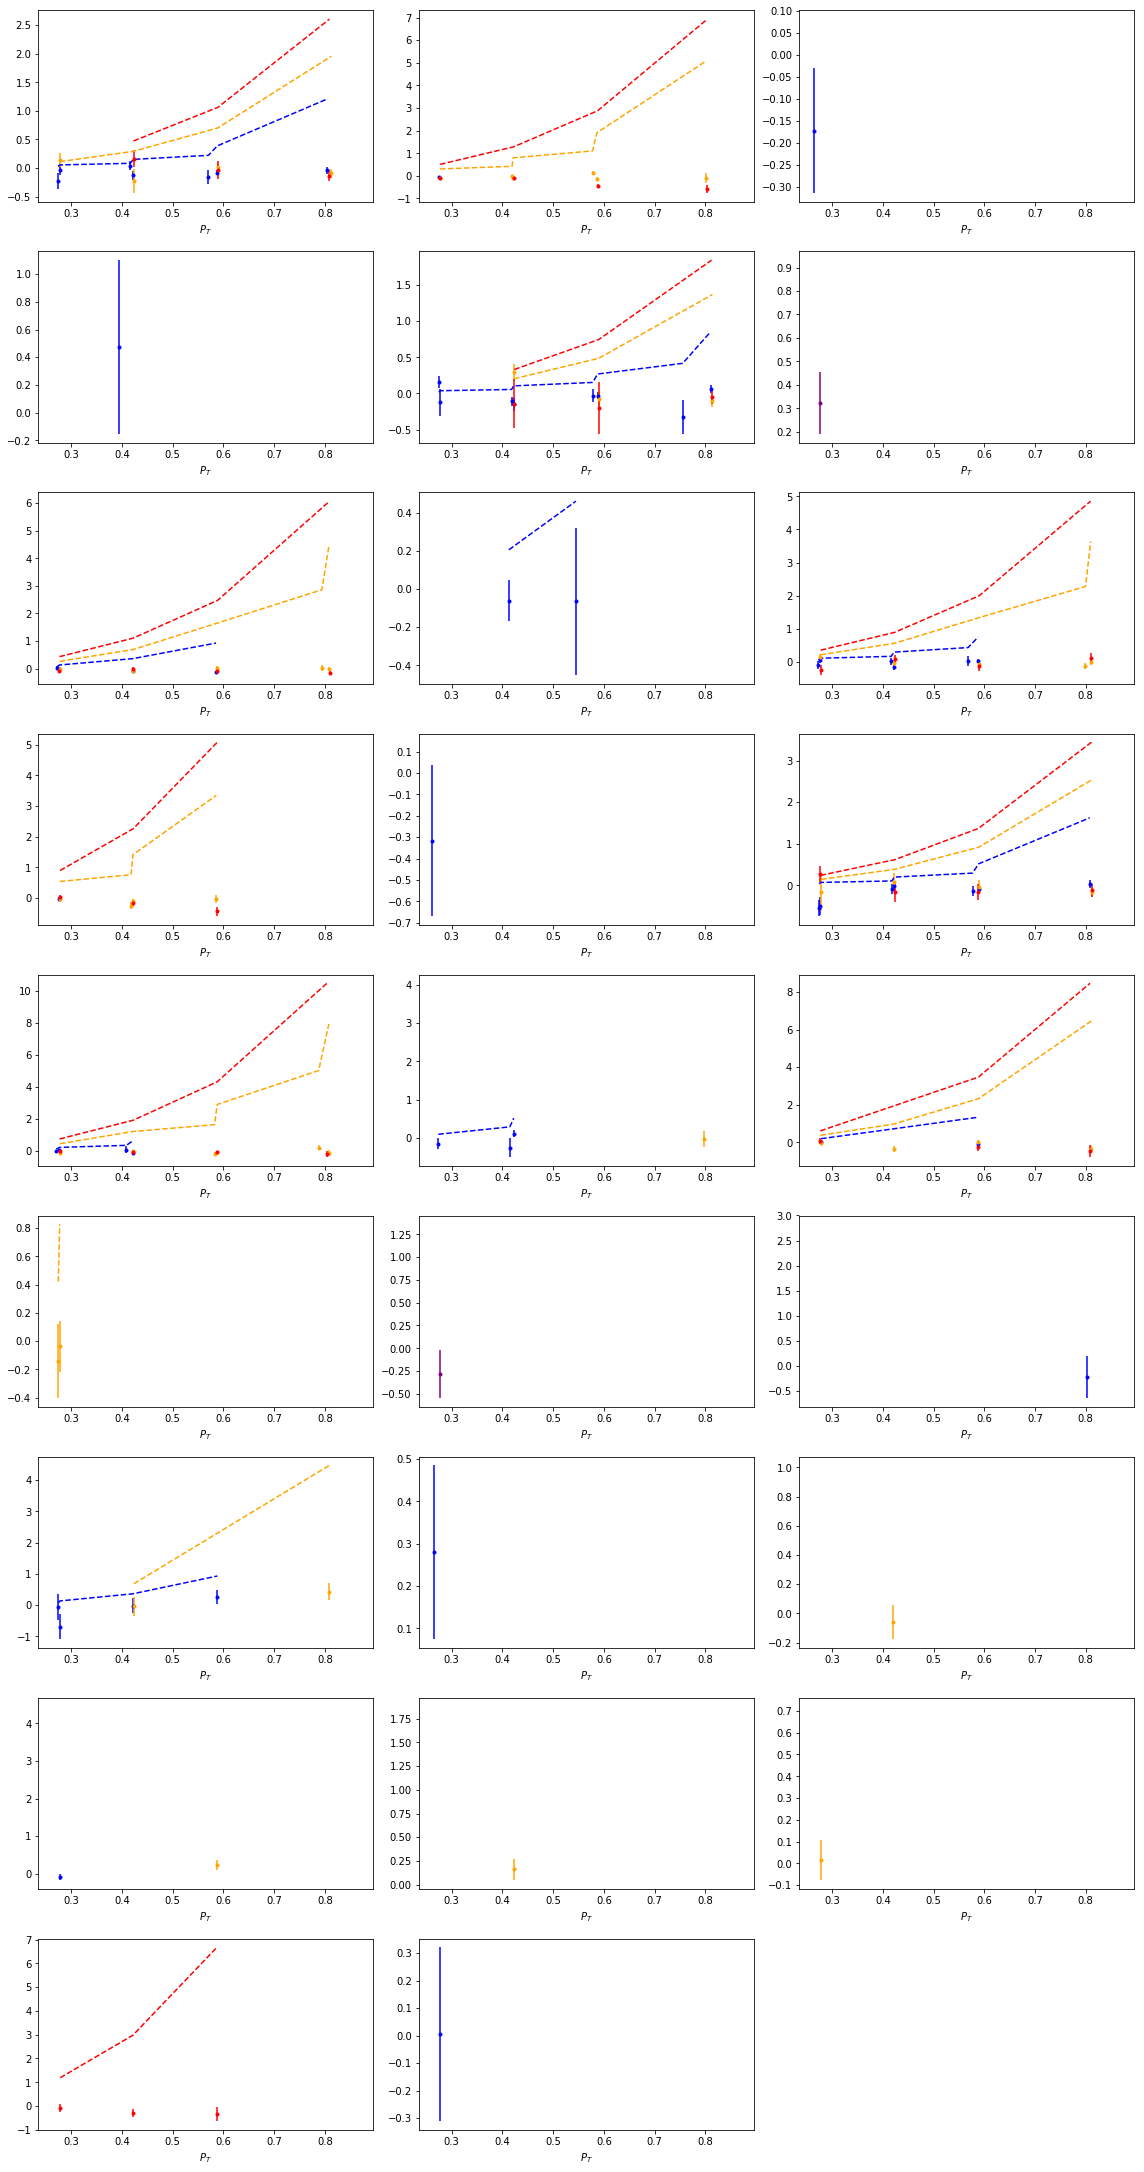

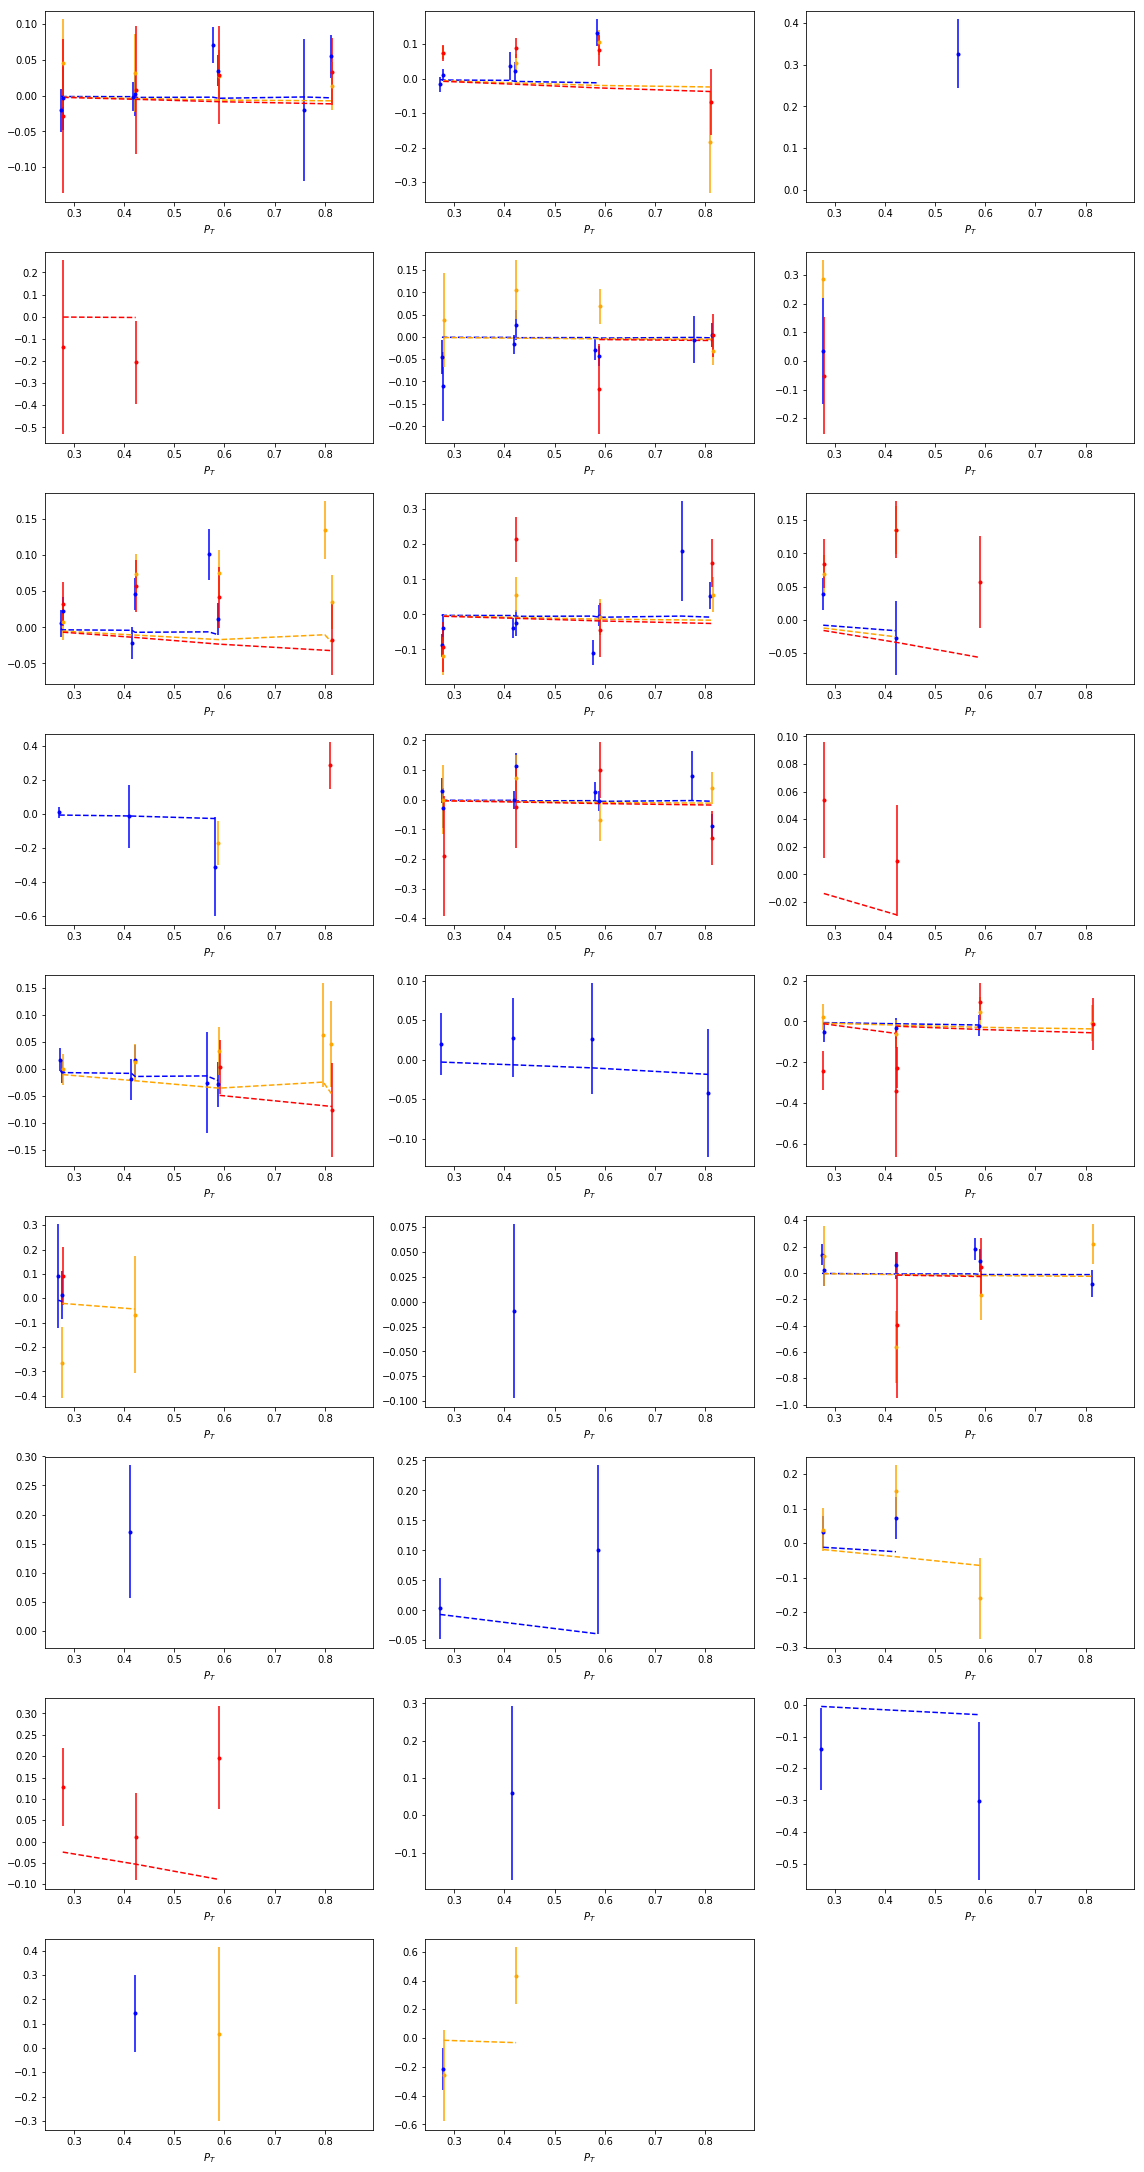

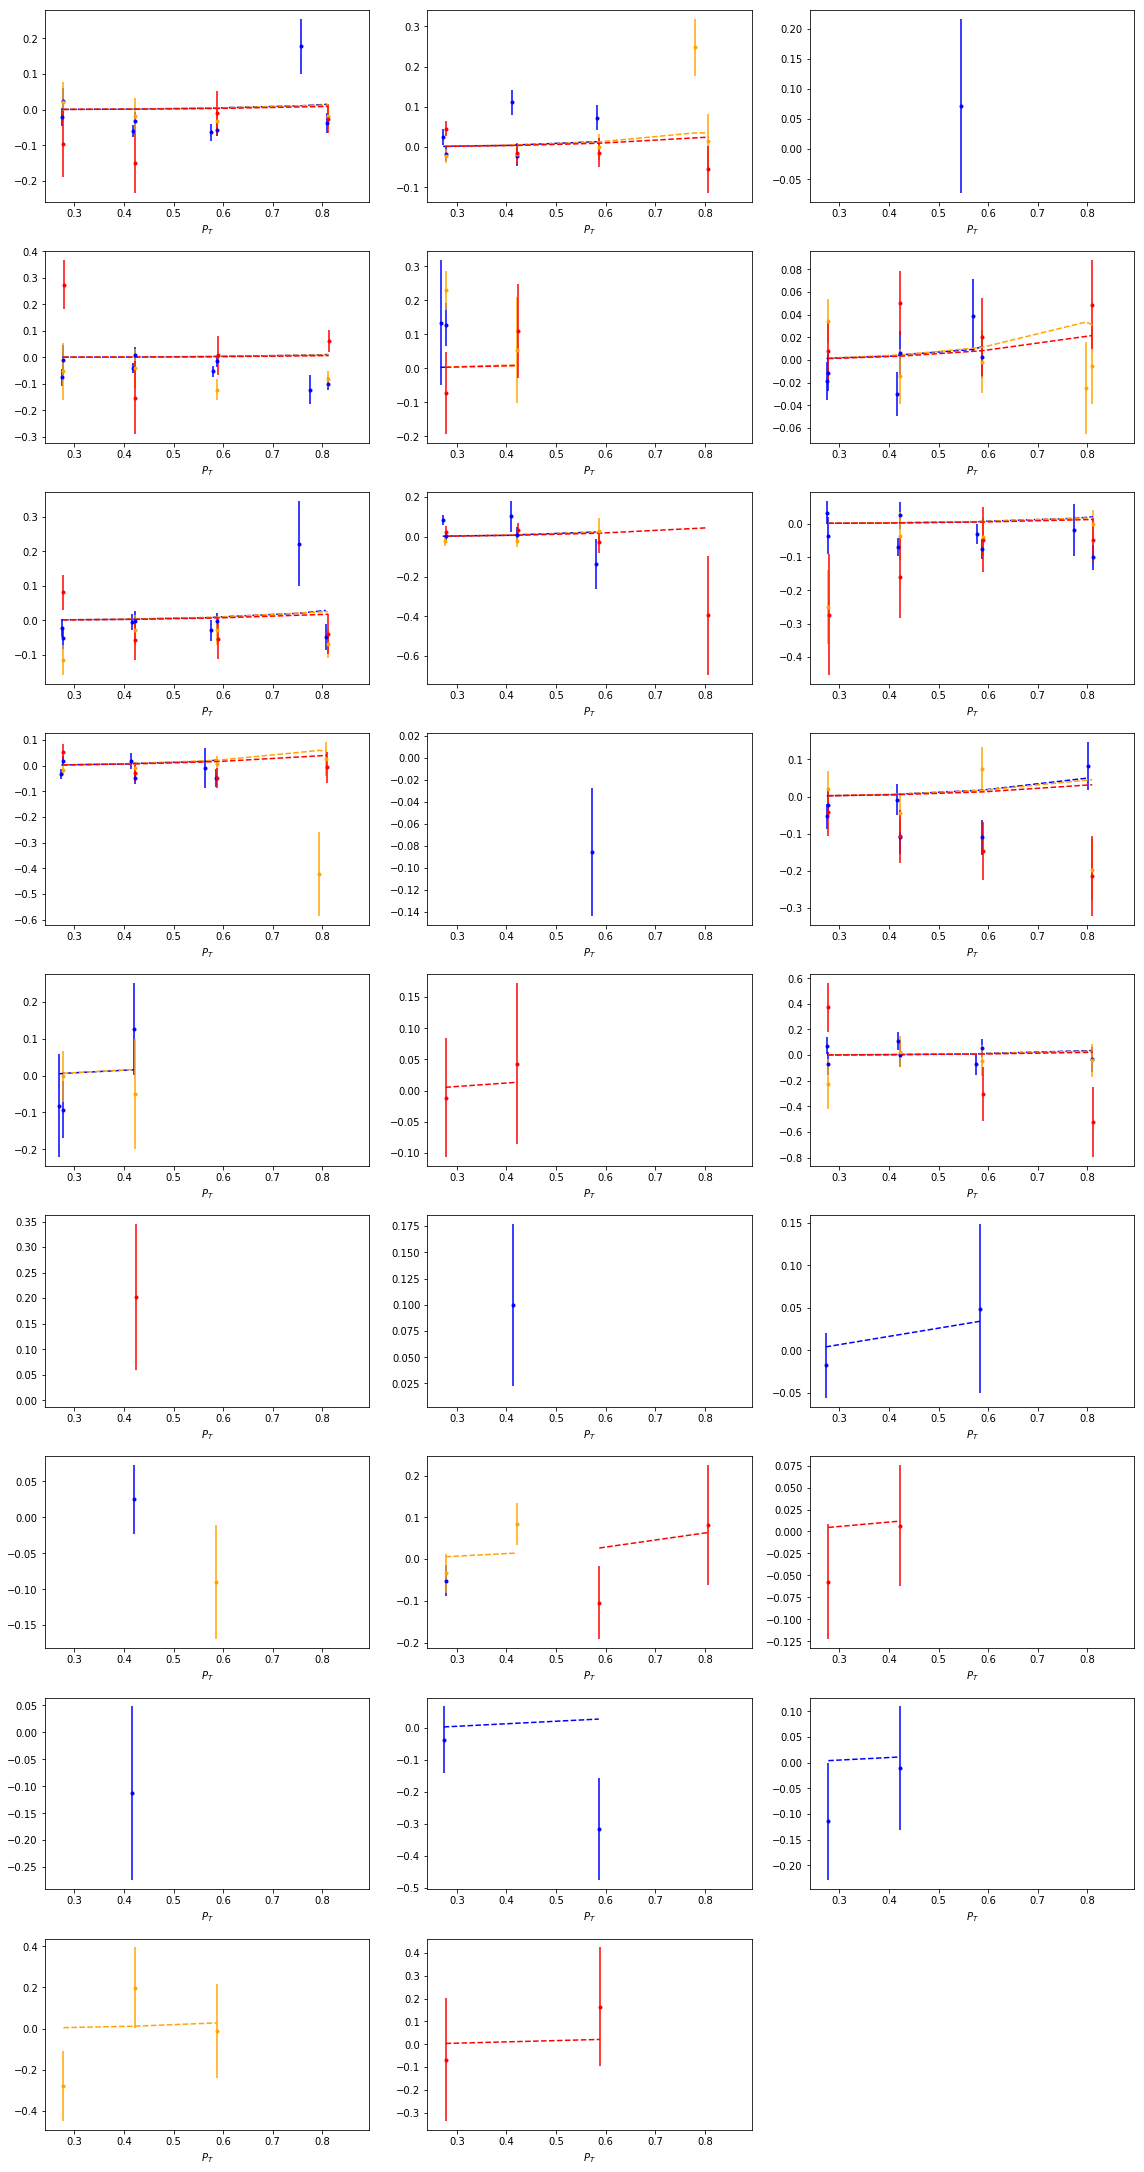

In [16]:
sets = [5000, 5001, 5002, 5003]

for d in sets:
    plot(datasets[d])